In [38]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

from pathlib import Path
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [25]:
dataset = Path('../dataset')
df = pd.read_csv(dataset/'accidents_clean_train.csv')
df.head()

,Area_accident_occured,Types_of_Junction,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Cause_of_accident,Day_of_week,Sex_of_driver,Age_band_of_driver,Accident_severity
0,Residential areas,No junction,Daylight,2,2,Moving Backward,Monday,Male,18-30,Slight Injury
1,Office areas,No junction,Daylight,2,2,Overtaking,Monday,Male,31-50,Slight Injury
2,Recreational areas,No junction,Daylight,2,2,Changing lane to the left,Monday,Male,18-30,Serious Injury
3,Office areas,Y Shape,Darkness - lights lit,2,2,Changing lane to the right,Sunday,Male,18-30,Slight Injury
4,Industrial areas,Y Shape,Darkness - lights lit,2,2,Overtaking,Sunday,Male,18-30,Slight Injury


In [26]:
df.shape

(8210, 10)

In [43]:
%run ../custom/jc-functions.ipynb

In [28]:
columns = list(df.columns)
print(columns)

['Area_accident_occured', 'Types_of_Junction', 'Light_conditions', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Cause_of_accident', 'Day_of_week', 'Sex_of_driver', 'Age_band_of_driver', 'Accident_severity']


In [29]:
data_quality_report_cat(df, columns)

Data Quality Report for Categorical Features
Stats
-----
                       Feature  Count  Missing  % Missing  Cardinality
0        Area_accident_occured   8210        0        0.0           14
1            Types_of_Junction   8210        0        0.0            8
2             Light_conditions   8210        0        0.0            4
3  Number_of_vehicles_involved   8210        0        0.0            6
4         Number_of_casualties   8210        0        0.0            8
5            Cause_of_accident   8210        0        0.0           20
6                  Day_of_week   8210        0        0.0            7
7                Sex_of_driver   8210        0        0.0            3
8           Age_band_of_driver   8210        0        0.0            5
9            Accident_severity   8210        0        0.0            3


Mode 1
------
                       Feature         Mode 1  Mode 1 Freq.  Mode 1 %
0        Area_accident_occured          Other          2671     32.53
1     

In [30]:
def cramers_v(x, y):
    """Calculate Cramér's V statistic for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

In [31]:
def cramers_v_matrix(df):
    """Create a correlation matrix for categorical features using Cramér's V."""
    cols = df.columns
    n = len(cols)
    corr_matrix = pd.DataFrame(np.zeros((n, n)), columns=cols, index=cols)

    for i in range(n):
        for j in range(i, n):
            v = cramers_v(df[cols[i]], df[cols[j]])
            corr_matrix.iat[i, j] = v
            corr_matrix.iat[j, i] = v

    return corr_matrix

In [32]:
categorical_columns = df.columns
categorical_df = df[categorical_columns]

cramers_v_corr_matrix = cramers_v_matrix(categorical_df)

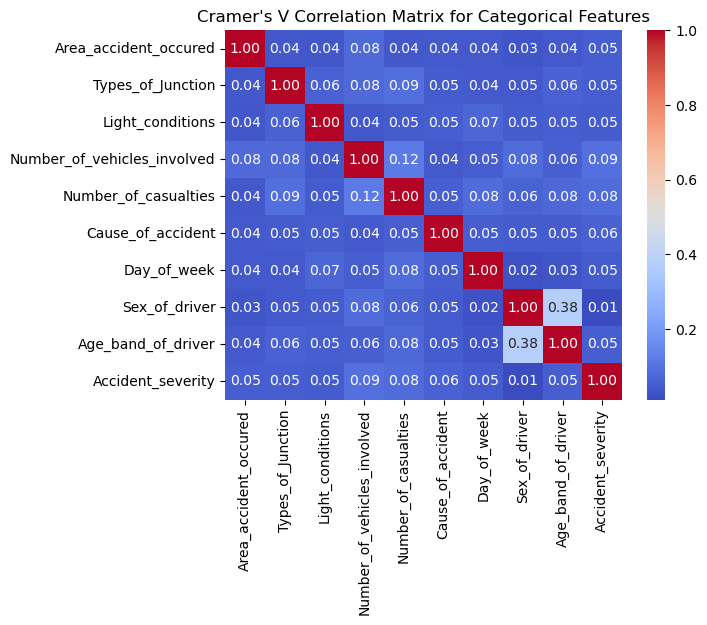

In [34]:
sns.heatmap(cramers_v_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cramer\'s V Correlation Matrix for Categorical Features')
plt.show()

In [48]:
columns

['Area_accident_occured',
 'Types_of_Junction',
 'Light_conditions',
 'Number_of_vehicles_involved',
 'Number_of_casualties',
 'Cause_of_accident',
 'Day_of_week',
 'Sex_of_driver',
 'Age_band_of_driver',
 'Accident_severity']

## Distribution

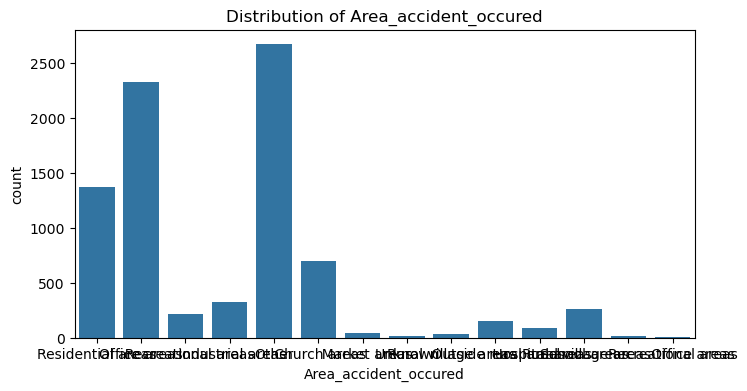

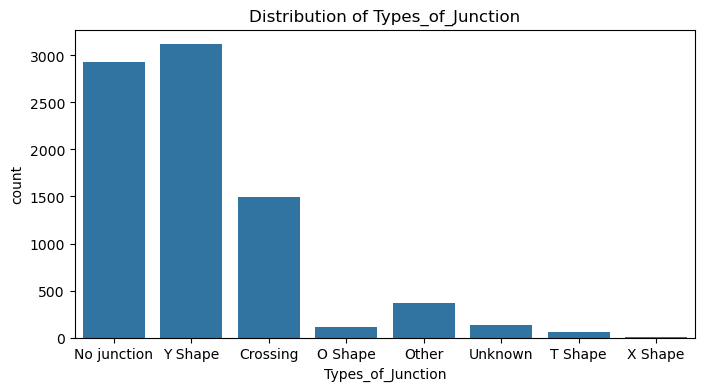

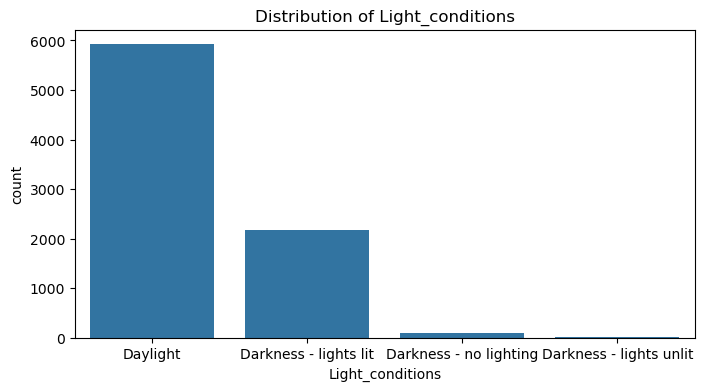

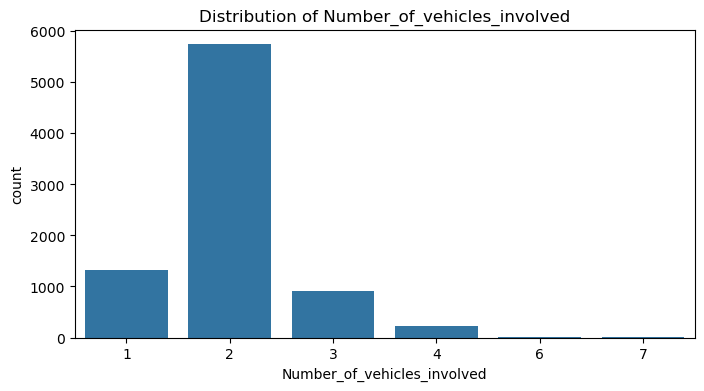

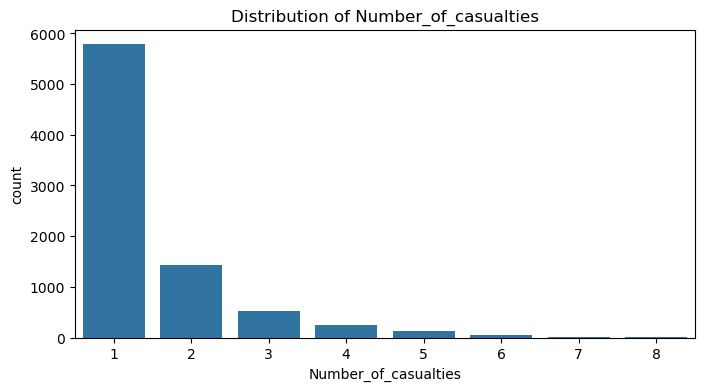

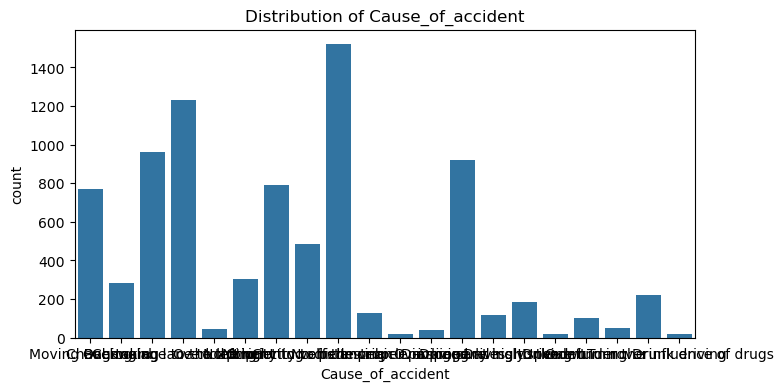

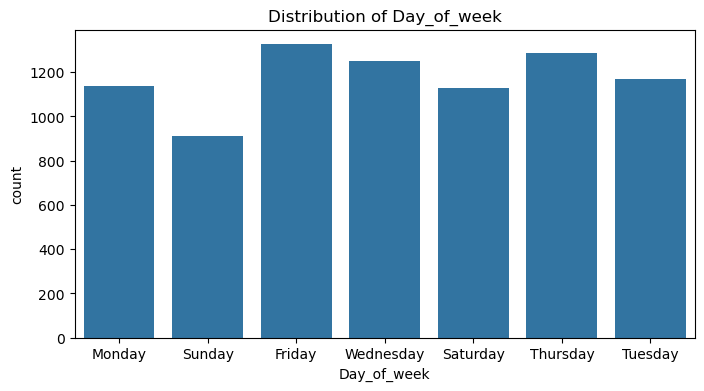

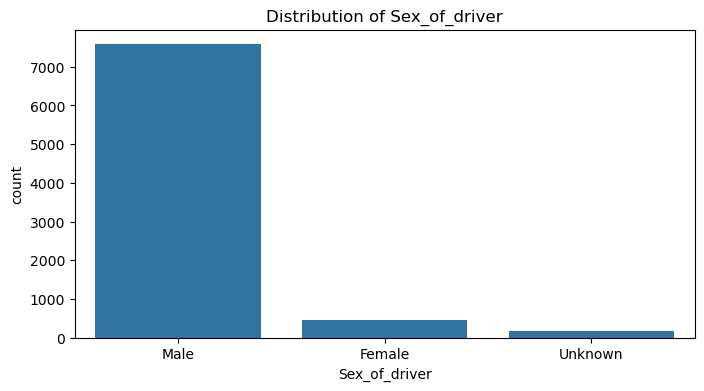

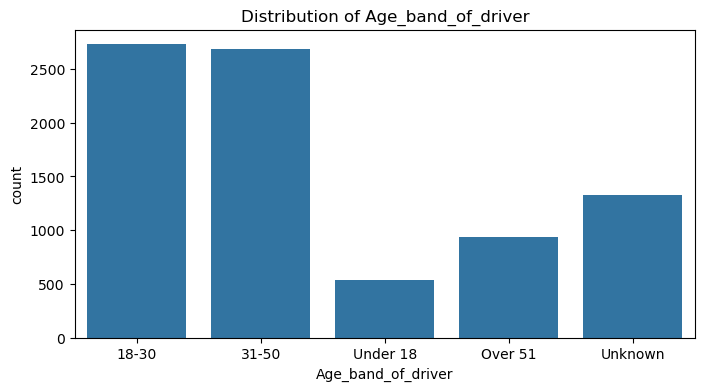

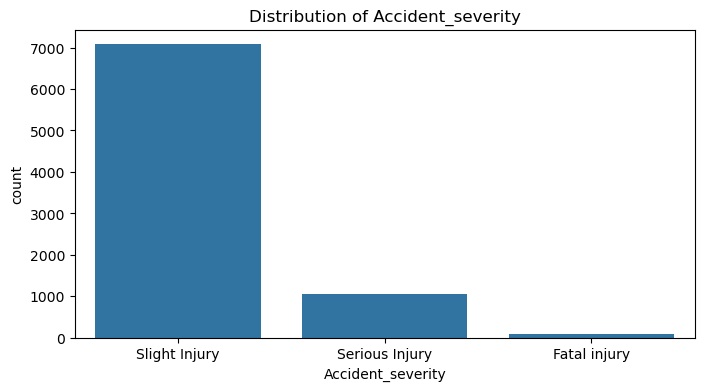

In [49]:
for col in columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()